In [5]:
source('../../function.r')

In [2]:
# read raw data
RAW <- read.csv(file='./CROP-seq_Jurkat_TCR.digital_expression.500genes.only_assigned.csv',header=TRUE,row.names=1)

In [10]:
a = RAW%>%.[,grep('CTRL',RAW['gene',])]

In [14]:
a%>%t%>%as.data.frame%>%pull(gene)%>%unique

[1] "CTRL"

In [29]:
RAW

,stimulated,stimulated.1,stimulated.2,stimulated.3,stimulated.4,stimulated.5,stimulated.6,stimulated.7,stimulated.8,stimulated.9,⋯,unstimulated.2636,unstimulated.2637,unstimulated.2638,unstimulated.2639,unstimulated.2640,unstimulated.2641,unstimulated.2642,unstimulated.2643,unstimulated.2644,unstimulated.2645
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
replicate,1,1,1,1,1,1,1,1,1,1,⋯,5,5,5,5,5,5,5,5,5,5
cell,TACTTGACCCCN,TTACAGCTGAAC,CTAAGGCCCTTA,CTTGACGCAGGT,TAACCCGTACGC,ATCTAGATACNN,CTATCGTTCTTN,GTATTGCGAGCN,GTACTGTGTTAN,CGTCTTTCANNN,⋯,CAAGTAGCCACG,CGTCCTGCCATG,GCCAAATCAAAT,GTCATTATAGGC,TTGTTTTAAAAN,GTGTGTCGGGGA,TTTAGTATTCCA,GGCGCCTAATCG,GCTGAGCGTTTN,ACTCGCAGAGAT
grna,CTRL00320,Tcrlibrary_JUND_2,Tcrlibrary_BACH2_3,Tcrlibrary_NFKB2_3,Tcrlibrary_JUN_1,CTRL00696,Tcrlibrary_NFKB1_1,Tcrlibrary_JUND_3,Tcrlibrary_JUNB_1,Tcrlibrary_NFKB2_2,⋯,Tcrlibrary_EGR4_3,Tcrlibrary_ZAP70_2,CTRL00320,CTRL00080,CTRL00080,CTRL00696,Tcrlibrary_EGR1_3,CTRL00688,Tcrlibrary_NR4A1_1,Tcrlibrary_REL_3
gene,CTRL,JUND,BACH2,NFKB2,JUN,CTRL,NFKB1,JUND,JUNB,NFKB2,⋯,EGR4,ZAP70,CTRL,CTRL,CTRL,CTRL,EGR1,CTRL,NR4A1,REL
GENE,,,,,,,,,,,⋯,,,,,,,,,,
A1BG,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1BG-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# split perturbed data as unstimulated data and stimulated

Y.unstimulated.raw <- RAW[,grepl('unstimulated', colnames(RAW), fixed = T)]
colnames(Y.unstimulated.raw) <- as.character(unlist(RAW['cell',grepl('unstimulated', colnames(RAW), fixed = T)]))


Y.stimulated.raw <- RAW[,grepl('^stimulated', colnames(RAW))]
colnames(Y.stimulated.raw) <- as.character(unlist(RAW['cell',grepl('^stimulated', colnames(RAW))]))

# the name of sgRNA
Y.stimulated.sgRNA <- as.character(unlist(RAW['gene',grepl('^stimulated', colnames(RAW))]))
Y.unstimulated.sgRNA <- as.character(unlist(RAW['gene',grepl('^unstimulated', colnames(RAW))]))

In [19]:
Y.unstimulated.raw%>%.[,grep('CTRL',.['gene',])]%>%.['gene',]%>%unlist%>%unique

[1] "CTRL"

In [20]:
# set unstimulated control cells as Z
Z.unstimulated <- t(Y.unstimulated.raw[6:dim(RAW)[1],which(Y.unstimulated.raw['gene',]=='CTRL')])

cat("dimention of Z:", dim(Z.unstimulated),'\n')

# Y: cells*genes
Y.stimulated <- t(Y.stimulated.raw[6:dim(Y.stimulated.raw)[1],])
Y.unstimulated <- t(Y.unstimulated.raw[6:dim(Y.unstimulated.raw)[1],])

cat("dimension of Y.stimulated(include control):", dim(Y.stimulated),'\n')
cat("dimension of Y.unstimulated(include control):", dim(Y.unstimulated))

dimention of Z: 615 36722 
dimension of Y.stimulated(include control): 3259 36722 
dimension of Y.unstimulated(include control): 2646 36722

In [28]:
rownames(RAW)%>%.[grep('CTRL',.)]%>%unique

[1] "CTRL"           "CTRL00018_gene" "CTRL00022_gene" "CTRL00080_gene"
 [5] "CTRL00087_gene" "CTRL00096_gene" "CTRL00196_gene" "CTRL00275_gene"
 [9] "CTRL00320_gene" "CTRL00405_gene" "CTRL00484_gene" "CTRL00493_gene"
[13] "CTRL00545_gene" "CTRL00616_gene" "CTRL00637_gene" "CTRL00640_gene"
[17] "CTRL00673_gene" "CTRL00688_gene" "CTRL00689_gene" "CTRL00696_gene"
[21] "CTRL00698_gene"

In [25]:
Y.unstimulated.raw[1:dim(RAW)[1],which(Y.unstimulated.raw['gene',]=='CTRL')]

,AAACAACCGAAN,TCAGTGGCTTCT,AGTATTCTCACN,TTATAGCATGCA,CTGTCCAGTCNN,GTCGTTTTAACN,TCTAGTGTGCNN,CAGGAACAAGNN,CCTACGGCCTNN,ACTGGGACGCAA,⋯,AAAAACAACTTT,GCTGGGTTTGTT,CGCTAGGCTTAC,TGGTAGTCTCTC,GGACATAATAGC,GCCAAATCAAAT,GTCATTATAGGC,TTGTTTTAAAAN,GTGTGTCGGGGA,GGCGCCTAATCG
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
replicate,1,1,1,1,1,1,1,1,1,1,⋯,5,5,5,5,5,5,5,5,5,5
cell,AAACAACCGAAN,TCAGTGGCTTCT,AGTATTCTCACN,TTATAGCATGCA,CTGTCCAGTCNN,GTCGTTTTAACN,TCTAGTGTGCNN,CAGGAACAAGNN,CCTACGGCCTNN,ACTGGGACGCAA,⋯,AAAAACAACTTT,GCTGGGTTTGTT,CGCTAGGCTTAC,TGGTAGTCTCTC,GGACATAATAGC,GCCAAATCAAAT,GTCATTATAGGC,TTGTTTTAAAAN,GTGTGTCGGGGA,GGCGCCTAATCG
grna,CTRL00698,CTRL00320,CTRL00087,CTRL00640,CTRL00484,CTRL00275,CTRL00087,CTRL00640,CTRL00196,CTRL00545,⋯,CTRL00275,CTRL00640,CTRL00616,CTRL00018,CTRL00696,CTRL00320,CTRL00080,CTRL00080,CTRL00696,CTRL00688
gene,CTRL,CTRL,CTRL,CTRL,CTRL,CTRL,CTRL,CTRL,CTRL,CTRL,⋯,CTRL,CTRL,CTRL,CTRL,CTRL,CTRL,CTRL,CTRL,CTRL,CTRL
GENE,,,,,,,,,,,⋯,,,,,,,,,,
A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
A1BG-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
A1CF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
Z.unstimulated%>%colnames%>%.[grep('CTRL',.)]%>%unique

[1] "CTRL"           "CTRL00018_gene" "CTRL00022_gene" "CTRL00080_gene"
 [5] "CTRL00087_gene" "CTRL00096_gene" "CTRL00196_gene" "CTRL00275_gene"
 [9] "CTRL00320_gene" "CTRL00405_gene" "CTRL00484_gene" "CTRL00493_gene"
[13] "CTRL00545_gene" "CTRL00616_gene" "CTRL00637_gene" "CTRL00640_gene"
[17] "CTRL00673_gene" "CTRL00688_gene" "CTRL00689_gene" "CTRL00696_gene"
[21] "CTRL00698_gene"

In [36]:
saveRDS(Z.unstimulated,'Z.unstimulated.rds')

saveRDSt design matrix of stimulated data

In [39]:
# stimulated part design matrix
sgRNAs <- (unique(Y.unstimulated.sgRNA))

X_design.unstimulated <- as.data.frame(matrix(0, nrow = dim(Y.unstimulated)[1], ncol = length(sgRNAs)))
i <- 1
for(s in sgRNAs){
    X_design.unstimulated[which(Y.unstimulated.sgRNA == s), i] <- 1
    i <- i+1
}
rownames(X_design.unstimulated) <- rownames(Y.unstimulated)
colnames(X_design.unstimulated) <- sgRNAs

# Seurat processing control cells Z

## using stimulated CTRL as Z

In [9]:
library(Seurat)

Warning message:
“package ‘Seurat’ was built under R version 4.1.2”
Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject



In [10]:
Z.seurat <- CreateSeuratObject(counts = t(Z.unstimulated), min.cells = 0, min.features = 0)

Z.seurat

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
36722 features across 615 samples within 1 assay 
Active assay: RNA (36722 features, 0 variable features)

In [11]:
Z.seurat <- NormalizeData(Z.seurat)

all.genes <- rownames(Z.seurat)
Z.seurat <- ScaleData(Z.seurat, features = all.genes)

Z.seurat <- RunPCA(Z.seurat, features = rownames(Z.seurat))

Centering and scaling data matrix

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 13982 features requested have zero variance (running reduction without them): A1CF, A2M, A2M-AS1, A2MP1, AADAC, AADACL2-AS1, AADACL3, AATK, AB015752.3, AB019438.66, ABBA01014710.1, ABBA01031658.1, ABC12-49244600F4.4, ABCA10, ABCA12, ABCA17P, ABCA6, ABCA8, ABCA9-AS1, ABCB1, ABCB10P1, ABCC12, ABCC13, ABCC3, ABCC5-AS1, ABCC6, ABCC8, ABCC9, ABCD1P2, ABCG4, ABCG5, ABHD12B, ABHD15-AS1, ABHD16B, ABHD17AP3, ABHD17AP6, ABI3BP, ABLIM3, ABT1P1, AC000032.2, AC000036.4, AC000068.10, AC000068.9, AC000078.5, AC000095.9, AC000120.7, AC000362.1, AC000370.2, AC002044.3, AC002044.4, AC002064.5, AC002064.7, AC002075.3, AC002076.10, AC002115.9, AC002306.1, AC002310.13, AC002310.14, AC002310.17, AC002314.4, AC002395.1, AC002398.12, AC002398.13, AC002401.1, AC002480.5, AC002486.2, AC002519.6, AC002519.8, AC002523.1, AC002539.2, AC002551.1, AC002553.4, AC002979.1, AC003002.6, A

In [12]:
Z.seurat <- FindNeighbors(Z.seurat, reduction = "pca", dims = 1:50, nn.eps = 0.5)
Z.seurat <- FindClusters(Z.seurat, resolution = 0.5, n.start = 10)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 615
Number of edges: 33323

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6915
Number of communities: 3
Elapsed time: 0 seconds


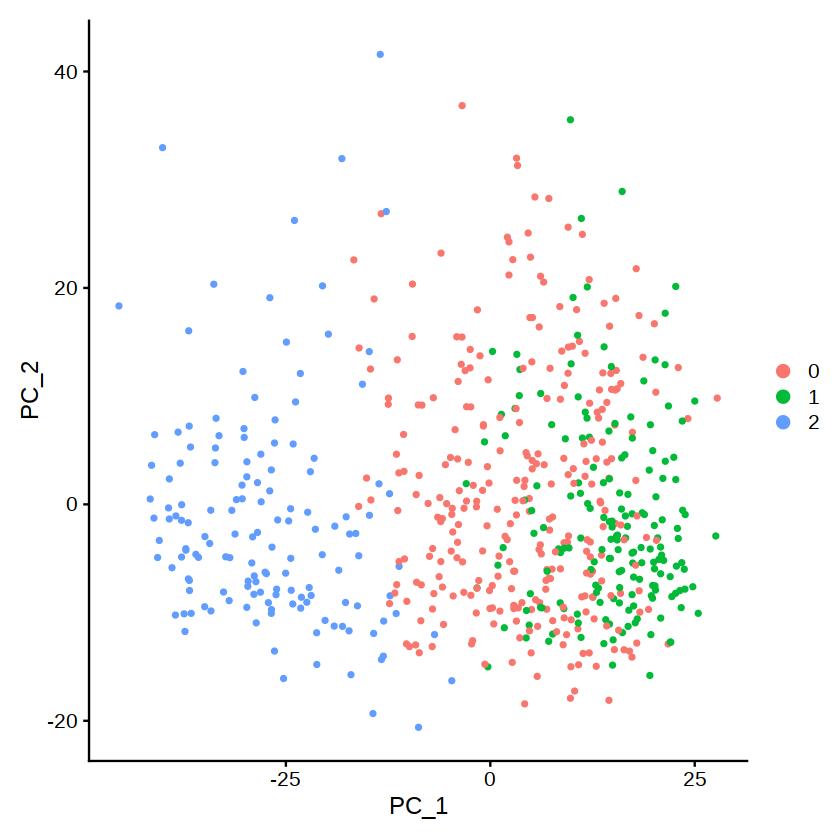

In [13]:
DimPlot(Z.seurat, reduction = "pca")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:45:52 UMAP embedding parameters a = 0.9922 b = 1.112

11:45:52 Read 615 rows and found 50 numeric columns

11:45:52 Using Annoy for neighbor search, n_neighbors = 30

11:45:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:45:52 Writing NN index file to temp file /tmp/RtmpSKOqzy/file43975721311fa

11:45:52 Searching Annoy index using 1 thread, search_k = 3000

11:45:52 Annoy recall = 100%

11:45:54 Commencing smooth kNN distance calibration using 1 thread

11:45:56 Initializing fro

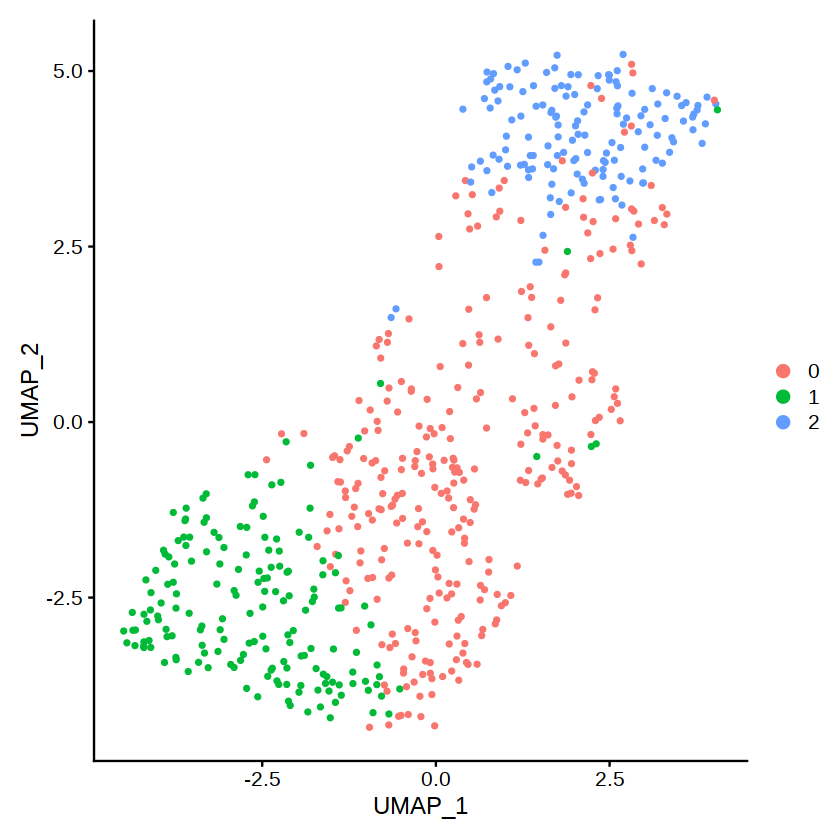

In [14]:
Z.seurat <- RunUMAP(Z.seurat,dim=1:50)


DimPlot(Z.seurat, reduction = "umap")

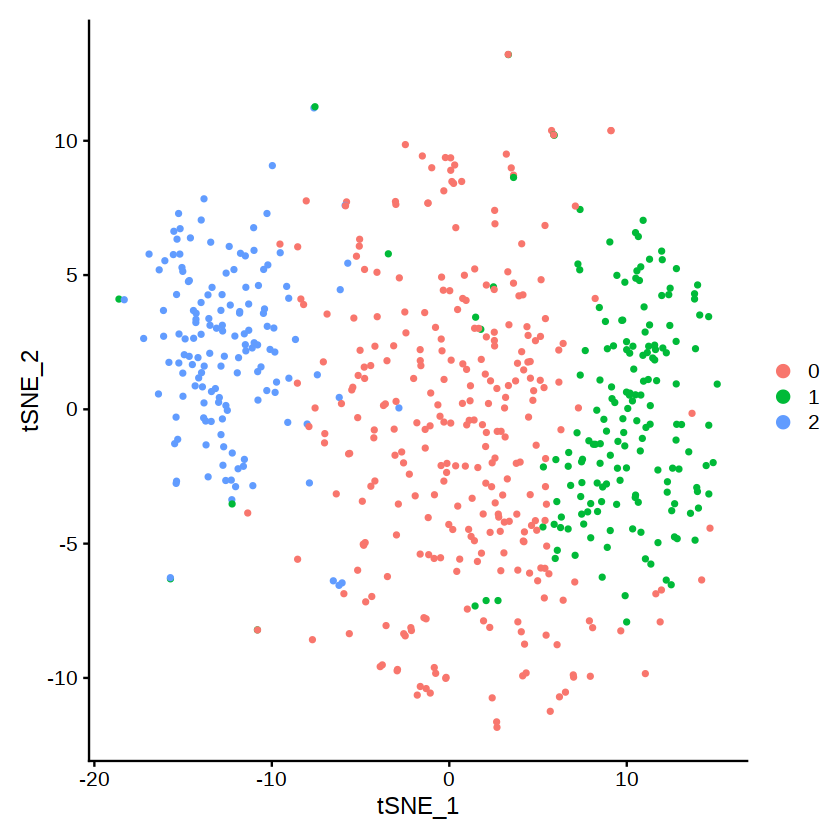

In [15]:
Z.seurat <- RunTSNE(Z.seurat, dims=1:50)

DimPlot(Z.seurat, reduction = "tsne")

# Only High Variable Genes

In [16]:
Z.seurat <- FindVariableFeatures(Z.seurat, selection.method = "vst", nfeatures = 600)

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.4878”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.30103”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  3.1869e-16”


When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 13982 rows containing missing values (geom_point).”


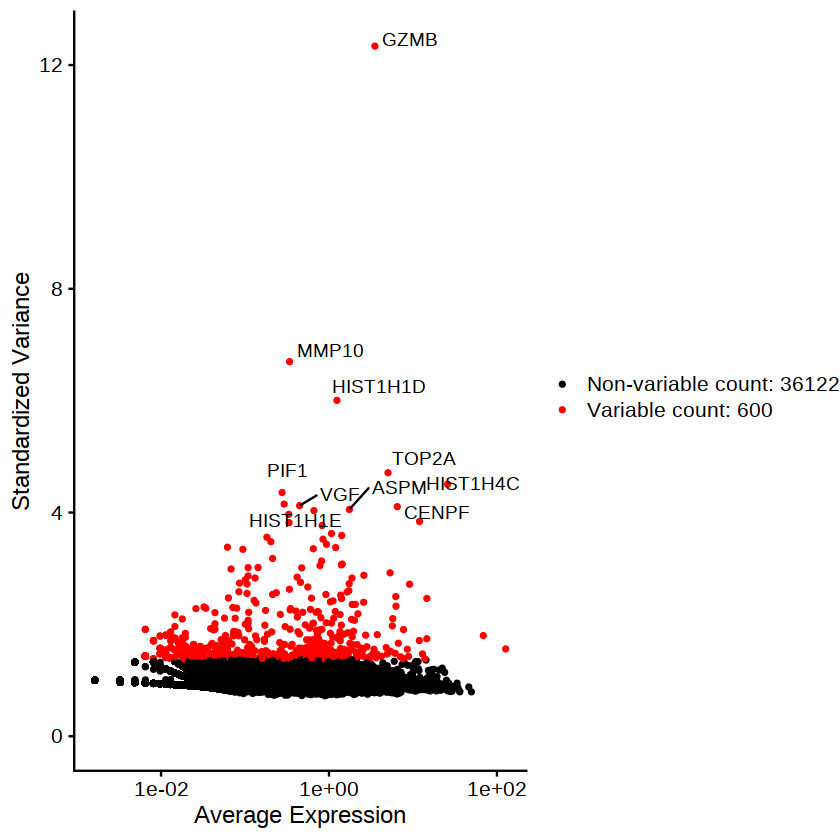

In [17]:
# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(Z.seurat), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(Z.seurat)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot2

In [18]:
all.genes <- rownames(Z.seurat)
Z.seurat <- ScaleData(Z.seurat,  features = VariableFeatures(object = Z.seurat))

Centering and scaling data matrix



In [19]:
Z.seurat <- RunPCA(Z.seurat, features = VariableFeatures(object = Z.seurat))

PC_ 1 
Positive:  GZMB, MMP10, PHLDA1, ARC, BCL2A1, CREB5, CTRL00637-gene, CD55, EOMES, CASC15 
	   CD226, CTRL00405-gene, TRAC, STATH, GEM, CTRL00640-gene, CTRL00080-gene, TNFRSF12A, FXYD2, FAM89A 
	   MIR4435-1HG, SH2D5, CTRL00196-gene, GPR183, ARMCX4, CTRL00545-gene, RP11-298I3.4, A1BG, TAGLN3, AC074117.13 
Negative:  TOP2A, MKI67, HMGB2, TPX2, NUSAP1, CDK1, GTSE1, TACC3, NCAPG, DLGAP5 
	   CENPF, CKAP2L, ASPM, PRC1, NDC80, BIRC5, AURKA, SMC4, HJURP, KIF15 
	   UBE2C, AURKB, KIF20B, CEP55, NUF2, TTK, KIF4A, HMGN2, TUBA1B, CENPE 
PC_ 2 
Positive:  TUBA1B, PCNA, TUBB, DUT, HSPA8, TYMS, KIAA0101, CLSPN, HMGN2, DNAJB1 
	   HMGB2, CCDC34, MYC, ACAT2, CENPM, DTL, USP1, HELLS, RRM2, FAM111B 
	   PSIP1, CCNE2, SMC1B, CD1E, RAG1, ATAD2, CHI3L2, NKX3-1, ZFP36L2, CENPU 
Negative:  VGF, GZMB, PHLDA1, TRAC, MMP10, SCG2, LINC00152, ATP2B1, LUCAT1, MIR4435-1HG 
	   ZFP36L1, BCL2A1, MALAT1, S100A2, KLF6, CREB5, VIM, MT2A, HLA-B, CTNNAL1 
	   SHC4, ATP6V0A4, ARC, HSPA5, ANXA1, EVI2A, CD82, BACH2, DU

In [20]:
Z.seurat <- FindNeighbors(Z.seurat, reduction = "pca", dims = 1:50, nn.eps = 0.5)
Z.seurat <- FindClusters(Z.seurat, resolution = 0.5, n.start = 10)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 615
Number of edges: 41012

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6883
Number of communities: 3
Elapsed time: 0 seconds


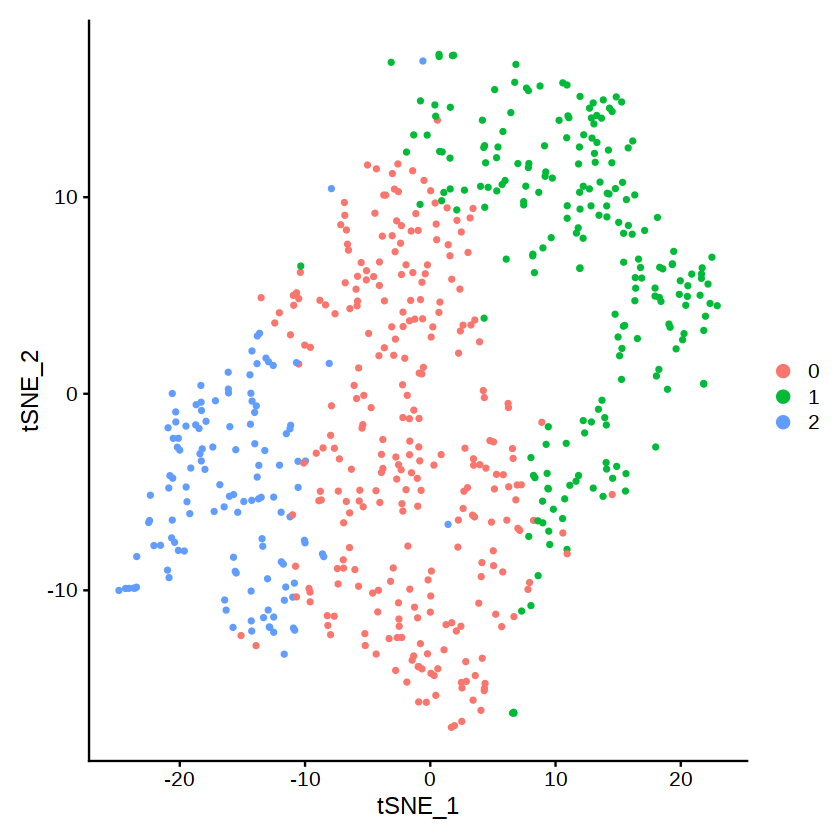

In [21]:
Z.seurat <- RunTSNE(Z.seurat, dims=1:10)
DimPlot(Z.seurat, reduction = "tsne")

In [22]:
CROP_variable_genes <- VariableFeatures(Z.seurat)

## Save all variables

In [23]:
Y.unstimulated <- apply(Y.unstimulated,c(1,2),as.numeric)
Z.unstimulated <- apply(Z.unstimulated, c(1,2), as.numeric)

In [40]:
save(CROP_variable_genes,X_design.unstimulated,Y.unstimulated,Z.unstimulated,
     file='variables_fromPreprocessing_unstimulated.image')

In [29]:
Y_sgRNA_all.stimulated <- list()
for(k in 1:dim(X_design.stimulated)[2]){
    
    Y_sgRNA_all.stimulated[[k]] <- Y.stimulated[X_design.stimulated[k]==1,]
    #cat("\ndimension of sgRNA",k," ", colnames(X_design.stimulated)[k],": ", dim(Y_sgRNA_all.stimulated[[k]]))
    
    #Y_sgRNA_all.unstimulated[[k]] <- apply(Y_sgRNA_all[[k]],c(1,2),as.double)
}

In [33]:
Y_sgRNA_all.stimulated[[1]]%>%dim

[1]   705 36722

In [35]:
Z.stimulated%>%dim

[1]   705 36722